In [1]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
from numpy import load
import os
import matplotlib as mpl
import matplotlib.pyplot as plt



In [3]:
np.random.seed(42)
tf.random.set_seed(42)

# Load time series data
n_steps = 60
series = load('univariate-time-series-1-step.npy')

X_train, y_train = series[:9000, :n_steps], series[:9000, -1]
X_valid, y_valid = series[9000:11000, :n_steps], series[9000:11000, -1]
X_test, y_test = series[11000:, :n_steps], series[11000:, -1]

# Reshape data to fit RNN input requirements
X_train = X_train.reshape((9000, n_steps, 1))
X_valid = X_valid.reshape((2000, n_steps, 1))
X_test = X_test.reshape((1000, n_steps, 1))

# Build RNN model with LSTM layers
model = keras.models.Sequential([
    keras.layers.Input(shape=[n_steps, 1]),
    keras.layers.LSTM(50, return_sequences=True),  # LSTM layer
    keras.layers.LSTM(50),  # Second LSTM layer
    keras.layers.Dense(1)  # Output layer for prediction
])

# Compile the model
model.compile(loss="mse", optimizer="adam")

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

# Evaluate the model on the test set
test_mse = model.evaluate(X_test, y_test)
print(f"Test MSE: {test_mse}")



Epoch 1/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 27s 78ms/step - loss: 0.0541 - val_loss: 0.0014
Epoch 2/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 36s 59ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 3/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 17s 59ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 4/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 5/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 17s 61ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 6/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 7/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 9/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 10/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 17s 59ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 11/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 12/20
282/282 ━━━━━━━━━━

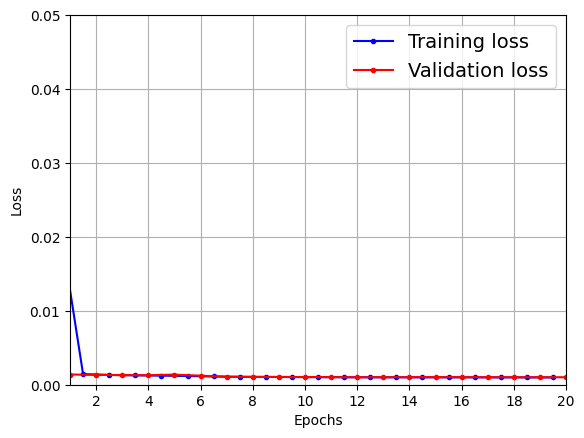

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [4]:
# Plot learning curves
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

# Predict on the test set
y_pred = model.predict(X_test)



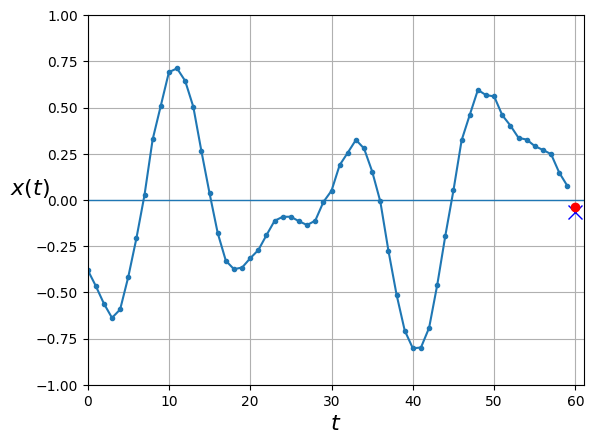

In [5]:
# Plot a few test predictions
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

plot_series(X_test[15, :, 0], y_test[15], y_pred[15])
plt.show()
